# 第3章 NumPyとTensorFlow


## NumPy を使った数値計算

In [1]:
import numpy as np

### NumPyのデータ型

In [2]:
# 要素3のベクトル
np.array([1, 2, 3])

array([1, 2, 3])

In [3]:
# 行列
np.array([
  [1, 2, 3],
  [3, 4, 5],
])

array([[1, 2, 3],
       [3, 4, 5]])

### ベクトルの計算

#### 和・差

In [4]:
x = np.array([2, 3])
y = np.array([2, 0])

In [5]:
x + y

array([4, 3])

In [6]:
x - y

array([0, 3])

#### ドット積

In [7]:
v1 = np.array([1, 2, 3])
v2 = np.array([2, 0, 1])

In [8]:
np.dot(v1, v2)

5

#### ファンシーインデックス

In [9]:
a = np.array([1, 2, 3, 4, 5])
a[[0, 2, 4]]

array([1, 3, 5])

#### ノルム計算

In [10]:
a = np.array([1, 2, 3])
np.linalg.norm(a)

3.7416573867739413

#### コサイン類似度

In [11]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

x = np.array([2, 3])
y = np.array([2, 0])

cos_sim(x, y)

0.5547001962252291

## TensorFlow

### GPUの設定を確認

In [12]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Kerasの学習済みモデル

In [13]:
model = tf.keras.applications.ResNet152(
 include_top=True,
 weights='imagenet',
 input_tensor=None,
 input_shape=None,
 pooling=None,
 classes=1000
)

In [14]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.661893 to fit



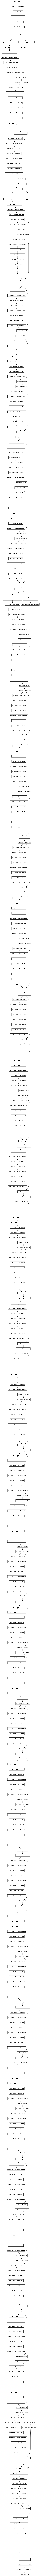

In [15]:
tf.keras.utils.plot_model(model)

### モデルの作成

Sequentialモデルの作成

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

s_model = keras.Sequential([
    layers.Dense(2, activation="relu"),
    layers.Dense(3, activation="relu"),
    layers.Dense(4)
])
s_model.build((1, 4))  # 入力サイズを (1, 4) で確定させる

s_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 2)                    10        
_________________________________________________________________
dense_1 (Dense)              (1, 3)                    9         
_________________________________________________________________
dense_2 (Dense)              (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Functional APIを利用してモデルを作成

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1, 4))
x = layers.Dense(2, activation="relu")(inputs)
x = layers.Dense(3, activation="relu")(x)
outputs = layers.Dense(4)(x)

f_model = Model(inputs=inputs, outputs=outputs)
f_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 4)]            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 2)              10        
_________________________________________________________________
dense_4 (Dense)              (None, 1, 3)              9         
_________________________________________________________________
dense_5 (Dense)              (None, 1, 4)              16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


### CNNモデルの作成

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

input_layer = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=(3, 3),
                  padding='same', activation='relu')(input_layer)
x = layers.Conv2D(filters=32, kernel_size=(3, 3),
                  padding='same', activation='relu')(input_layer)
x = layers.Flatten()(x)
x = layers.Dense(units=10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=x)

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


### MNISTを使った学習

In [20]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

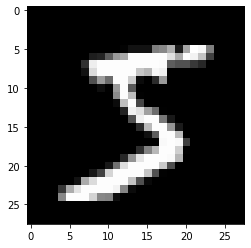

In [21]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")

(サンプル数, 28, 28, 1)にreshapeする

In [22]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

-1から1の範囲に正規化

In [23]:
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

ラベルをone-hotベクトルに変換

In [24]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

モデルをコンパイル

In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

モデルを訓練

In [26]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1737 - accuracy: 0.9487
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0250 - accuracy: 0.9919


モデルを評価

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9810


[0.06503969430923462, 0.9810000061988831]